# Class Sizes Preliminary EDA / Cleaning Notebook
[Return to project overview](final_project_overview.ipynb)

### Andrew Larimer, Deepak Nagaraj, Daniel Olmstead, Michael Winton (W207-4-Summer 2018 Final Project)

The [2016-2017 NYC Class Size Report](https://www.kaggle.com/marcomarchetti/20162017-nyc-class-size-report) dataset includes the following information:

- number of students
- number of classes
- average class size
- minimum class size
- maximum class size

by School x Program Type x Department x Subject.

It also contains a school-wide pupil-to-teacher ratio.

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# set default options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

%matplotlib inline

In [2]:
# load dataset from CSV
raw_class_sizes_df = pd.read_csv('February2017_Avg_ClassSize_School_all.csv')

# look at top-level stats on the dataset
raw_class_sizes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31713 entries, 0 to 31712
Data columns (total 12 columns):
DBN                           31713 non-null object
School Name                   31713 non-null object
Grade Level                   31713 non-null object
Program Type                  31713 non-null object
Number of Students            31713 non-null int64
Number of Classes             31713 non-null int64
Average Class Size            31713 non-null float64
Minimum Class Size            31713 non-null float64
Maximum Class Size            31713 non-null float64
Department                    19421 non-null object
Subject                       19421 non-null object
School Pupil-Teacher Ratio    31713 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [3]:
# remove the rows that aren't part of the 'MS Core' dataset
class_sizes_df = raw_class_sizes_df[raw_class_sizes_df['Grade Level'] == 'MS Core']

# check summary stats after filtering
class_sizes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6105 entries, 0 to 19401
Data columns (total 12 columns):
DBN                           6105 non-null object
School Name                   6105 non-null object
Grade Level                   6105 non-null object
Program Type                  6105 non-null object
Number of Students            6105 non-null int64
Number of Classes             6105 non-null int64
Average Class Size            6105 non-null float64
Minimum Class Size            6105 non-null float64
Maximum Class Size            6105 non-null float64
Department                    6105 non-null object
Subject                       6105 non-null object
School Pupil-Teacher Ratio    6105 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 620.0+ KB


In [4]:
# preview the data
class_sizes_df.head(10)

,DBN,School Name,Grade Level,Program Type,Number of Students,Number of Classes,Average Class Size,Minimum Class Size,Maximum Class Size,Department,Subject,School Pupil-Teacher Ratio
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,MS Core,Gen Ed,73,3,24.3,14.0,30.0,English,MS English Core,9.0
1,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,MS Core,Gen Ed,73,3,24.3,14.0,30.0,Math,MS Math Core,9.0
2,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,MS Core,Gen Ed,73,3,24.3,14.0,30.0,Science,MS Science Core,9.0
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,MS Core,Gen Ed,73,3,24.3,14.0,30.0,Social Studies,MS Social Studies Core,9.0
4,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,MS Core,ICT,85,3,28.3,24.0,31.0,English,MS English Core,9.0
5,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,MS Core,ICT,85,3,28.3,24.0,31.0,Math,MS Math Core,9.0
6,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,MS Core,ICT,85,3,28.3,24.0,31.0,Science,MS Science Core,9.0
7,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,MS Core,ICT,85,3,28.3,24.0,31.0,Social Studies,MS Social Studies Core,9.0
8,01M140,P.S. 140 NATHAN STRAUS,MS Core,Accelerated,13,1,13.0,13.0,13.0,Science,MS Science Other,12.6
9,01M140,P.S. 140 NATHAN STRAUS,MS Core,Gen Ed,82,3,27.3,26.0,28.0,English,MS English Core,12.6


In [5]:
# split out school-level pupil-teacher ratios into new dataframe with one row per school
ratio_df = class_sizes_df.groupby(['DBN'])['School Pupil-Teacher Ratio'].mean()
ratio_df.describe().round(2)

count    494.00
mean      13.49
std        2.88
min        4.10
25%       11.70
50%       13.50
75%       15.30
max       23.90
Name: School Pupil-Teacher Ratio, dtype: float64

In [6]:
# sum num students and classes by school x department (combining across different program types and subjects)
class_stats_df = class_sizes_df.groupby(['DBN','Department'])['Number of Students','Number of Classes'].sum()

# derive an average class size column
class_stats_df['Average Class Size'] = class_stats_df['Number of Students'] / class_stats_df['Number of Classes']

# take a quick look at the output
class_stats_df.head(20).round(2)

Number of Students  Number of Classes  \
DBN    Department                                              
01M034 English                        158                  6   
       Math                           158                  6   
       Science                        158                  6   
       Social Studies                 158                  6   
01M140 English                        213                  9   
       Math                           186                  9   
       Science                        182                  9   
       Social Studies                 186                  8   
01M184 English                        254                 10   
       Math                           254                 10   
       Science                        254                 10   
       Social Studies                 254                 10   
01M188 English                         83                  2   
       Math                           179                  7   
       Science                        181                  8   
01M301 English                        127                  6   
       Math                           127                  6   
       Science                        127                  6   
       Social Studies                 127                  6   
01M332 English                        239                 13   

                       Average Class Size  
DBN    Department                          
01M034 English                      26.33  
       Math                         26.33  
       Science                      26.33  
       Social Studies               26.33  
01M140 English                      23.67  
       Math                         20.67  
       Science                      20.22  
       Social Studies               23.25  
01M184 English                      25.40  
       Math                         25.40  
       Science                      25.40  
       Social Studies               25.40  
01M188 English                      41.50  
       Math                         25.57  
       Science                      22.62  
01M301 English                      21.17  
       Math                         21.17  
       Science                      21.17  
       Social Studies               21.17  
01M332 English                      18.38

In [7]:
# reindex to integer rownums so we can pivot.  We want columns for the subjects, not rows.
class_stats_df = class_stats_df.reset_index()

# pivot to get department x stats into columns, not rows.  Note that DBN is now the index
class_stats_pivot_df = class_stats_df.pivot(index='DBN', columns='Department')

# take a quick look at the output
class_stats_pivot_df.head(20)

Number of Students                                 \
Department            English    Math Science Social Studies   
DBN                                                            
01M034                  158.0   158.0   158.0          158.0   
01M140                  213.0   186.0   182.0          186.0   
01M184                  254.0   254.0   254.0          254.0   
01M188                   83.0   179.0   181.0            NaN   
01M301                  127.0   127.0   127.0          127.0   
01M332                  239.0   458.0   229.0            NaN   
01M378                  282.0   335.0   282.0          268.0   
01M450                  306.0   309.0   300.0          300.0   
01M539                  412.0   392.0   412.0          412.0   
01M839                    NaN   402.0   373.0            NaN   
02M104                 1750.0  1138.0  1138.0         1173.0   
02M114                  443.0   508.0   443.0          443.0   
02M126                  462.0   570.0   344.0          344.0   
02M131                  458.0   476.0   444.0          444.0   
02M167                 1349.0  1349.0  1349.0         1349.0   
02M177                  211.0   211.0   289.0          211.0   
02M217                   61.0    61.0    72.0           61.0   
02M225                    NaN    68.0    68.0            NaN   
02M255                    NaN   390.0   521.0            NaN   
02M260                  377.0   327.0   290.0          302.0   

           Number of Classes                              Average Class Size  \
Department           English  Math Science Social Studies            English   
DBN                                                                            
01M034                   6.0   6.0     6.0            6.0          26.333333   
01M140                   9.0   9.0     9.0            8.0          23.666667   
01M184                  10.0  10.0    10.0           10.0          25.400000   
01M188                   2.0   7.0     8.0            NaN          41.500000   
01M301                   6.0   6.0     6.0            6.0          21.166667   
01M332                  13.0  24.0    11.0            NaN          18.384615   
01M378                  14.0  16.0    14.0           13.0          20.142857   
01M450                  13.0  16.0    13.0           15.0          23.538462   
01M539                  15.0  15.0    15.0           15.0          27.466667   
01M839                   NaN  13.0    12.0            NaN                NaN   
02M104                  64.0  41.0    41.0           43.0          27.343750   
02M114                  15.0  21.0    13.0           15.0          29.533333   
02M126                  16.0  20.0    12.0           12.0          28.875000   
02M131                  24.0  20.0    19.0           20.0          19.083333   
02M167                  44.0  44.0    44.0           44.0          30.659091   
02M177                   8.0   8.0    11.0            8.0          26.375000   
02M217                   3.0   3.0     4.0            3.0          20.333333   
02M225                   NaN   2.0     3.0            NaN                NaN   
02M255                   NaN  12.0    16.0            NaN                NaN   
02M260                  11.0  11.0     9.0           10.0          34.272727   

                                                 
Department       Math    Science Social Studies  
DBN                                              
01M034      26.333333  26.333333      26.333333  
01M140      20.666667  20.222222      23.250000  
01M184      25.400000  25.400000      25.400000  
01M188      25.571429  22.625000            NaN  
01M301      21.166667  21.166667      21.166667  
01M332      19.083333  20.818182            NaN  
01M378      20.937500  20.142857      20.615385  
01M450      19.312500  23.076923      20.000000  
01M539      26.133333  27.466667      27.466667  
01M839      30.923077  31.083333            NaN  
02M104      27.756098  27.756098      27.279070

In [8]:
# set column names based on the "levels" generated during groupby
class_sizes_cleaned_df = class_stats_pivot_df.copy(deep=False)
class_sizes_cleaned_df.columns = [' '.join(col).strip() for col in class_sizes_cleaned_df.columns.values]

# join the class size stats with student-teacher ratio
class_sizes_cleaned_df = class_sizes_cleaned_df.join(ratio_df)
class_sizes_cleaned_df.head(20)

,Number of Students English,Number of Students Math,Number of Students Science,Number of Students Social Studies,Number of Classes English,Number of Classes Math,Number of Classes Science,Number of Classes Social Studies,Average Class Size English,Average Class Size Math,Average Class Size Science,Average Class Size Social Studies,School Pupil-Teacher Ratio
DBN,,,,,,,,,,,,,
01M034,158.0,158.0,158.0,158.0,6.0,6.0,6.0,6.0,26.333333,26.333333,26.333333,26.333333,9.0
01M140,213.0,186.0,182.0,186.0,9.0,9.0,9.0,8.0,23.666667,20.666667,20.222222,23.250000,12.6
01M184,254.0,254.0,254.0,254.0,10.0,10.0,10.0,10.0,25.400000,25.400000,25.400000,25.400000,14.3
01M188,83.0,179.0,181.0,NaN,2.0,7.0,8.0,NaN,41.500000,25.571429,22.625000,NaN,11.1
01M301,127.0,127.0,127.0,127.0,6.0,6.0,6.0,6.0,21.166667,21.166667,21.166667,21.166667,7.5
01M332,239.0,458.0,229.0,NaN,13.0,24.0,11.0,NaN,18.384615,19.083333,20.818182,NaN,9.7
01M378,282.0,335.0,282.0,268.0,14.0,16.0,14.0,13.0,20.142857,20.937500,20.142857,20.615385,10.8
01M450,306.0,309.0,300.0,300.0,13.0,16.0,13.0,15.0,23.538462,19.312500,23.076923,20.000000,13.7
01M539,412.0,392.0,412.0,412.0,15.0,15.0,15.0,15.0,27.466667,26.133333,27.466667,27.466667,18.9


## Summary stats and histograms of key columns

In [9]:
class_sizes_cleaned_df.describe().round(2)

,Number of Students English,Number of Students Math,Number of Students Science,Number of Students Social Studies,Number of Classes English,Number of Classes Math,Number of Classes Science,Number of Classes Social Studies,Average Class Size English,Average Class Size Math,Average Class Size Science,Average Class Size Social Studies,School Pupil-Teacher Ratio
count,484.00,493.00,494.00,474.00,484.00,493.00,494.00,474.00,484.00,493.00,494.00,474.00,494.00
mean,524.02,471.07,415.98,408.90,22.41,19.76,16.76,16.56,23.24,23.52,23.83,23.69,13.49
std,531.32,467.53,387.03,392.55,23.29,19.46,14.03,14.38,4.57,4.33,4.20,4.35,2.88
min,9.00,34.00,24.00,9.00,1.00,2.00,1.00,1.00,4.14,5.06,11.00,8.23,4.10
25%,219.75,210.00,191.00,178.25,9.75,9.00,9.00,8.00,20.55,20.55,21.09,21.10,11.70
50%,340.00,311.00,282.00,272.00,15.00,14.00,12.00,12.00,23.21,23.73,23.90,23.82,13.50
75%,585.25,511.00,451.75,443.75,25.00,22.00,18.00,18.00,26.00,26.27,26.61,26.66,15.30
max,3960.00,3960.00,2058.00,2360.00,270.00,220.00,82.00,90.00,41.50,39.80,36.14,37.60,23.90


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11028b6d8>]], dtype=object)

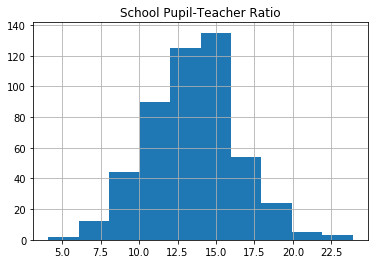

In [10]:
class_sizes_cleaned_df.hist(column='School Pupil-Teacher Ratio')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e2f3a58>]], dtype=object)

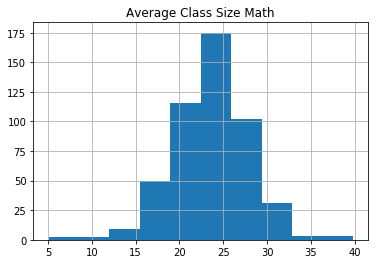

In [11]:
class_sizes_cleaned_df.hist(column='Average Class Size Math')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e361278>]], dtype=object)

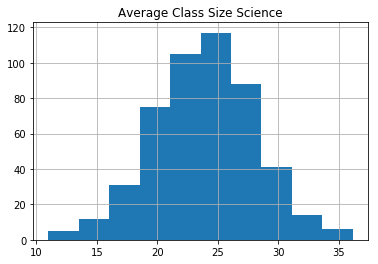

In [12]:
class_sizes_cleaned_df.hist(column='Average Class Size Science')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110833ef0>]], dtype=object)

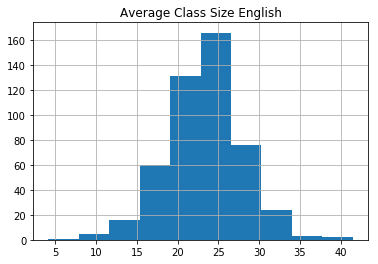

In [13]:
class_sizes_cleaned_df.hist(column='Average Class Size English')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110887cc0>]], dtype=object)

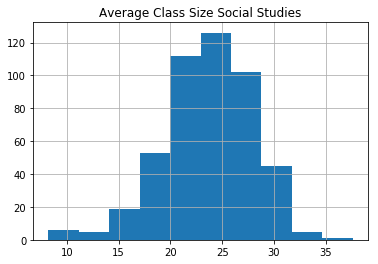

In [14]:
class_sizes_cleaned_df.hist(column='Average Class Size Social Studies')

In [15]:
# check final shape (rows = number of schools)
# should be (494, 13)
class_sizes_cleaned_df.shape

(494, 13)

In [16]:
# save the cleaned dataset to CSV
class_sizes_cleaned_df.to_csv('class_sizes_cleaned.csv')